In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [77]:
df = pd.read_excel('PahaW.xlsx')
df.shape
df.head()


,ID,Nationality,Sex,Disease,PD status,Age,Dominant hand,LED,UPDRS V,Length of PD
0,1,Czech,F,PD,ON,68,R,1115.0,2.0,6.0
1,2,Czech,F,PD,ON,78,R,2110.0,2.0,8.0
2,3,Czech,F,PD,ON,69,R,1556.6,2.0,7.0
3,4,Czech,F,PD,ON,79,R,1691.0,2.0,12.0
4,5,Czech,F,PD,ON,69,R,600.0,2.0,2.0


In [78]:
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64','object']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [79]:
data = df[numerical_features]

In [80]:
data.head()

,ID,Nationality,Sex,Disease,PD status,Age,Dominant hand,LED,UPDRS V,Length of PD
0,1,Czech,F,PD,ON,68,R,1115.0,2.0,6.0
1,2,Czech,F,PD,ON,78,R,2110.0,2.0,8.0
2,3,Czech,F,PD,ON,69,R,1556.6,2.0,7.0
3,4,Czech,F,PD,ON,79,R,1691.0,2.0,12.0
4,5,Czech,F,PD,ON,69,R,600.0,2.0,2.0


In [81]:
X = data.drop(['Nationality','Sex','Disease','PD status','Dominant hand','ID'], axis=1)
X.shape

(75, 4)

In [82]:
y = data['PD status']
y.shape

(75,)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((52, 4), (52,), (23, 4), (23,))

<AxesSubplot:>

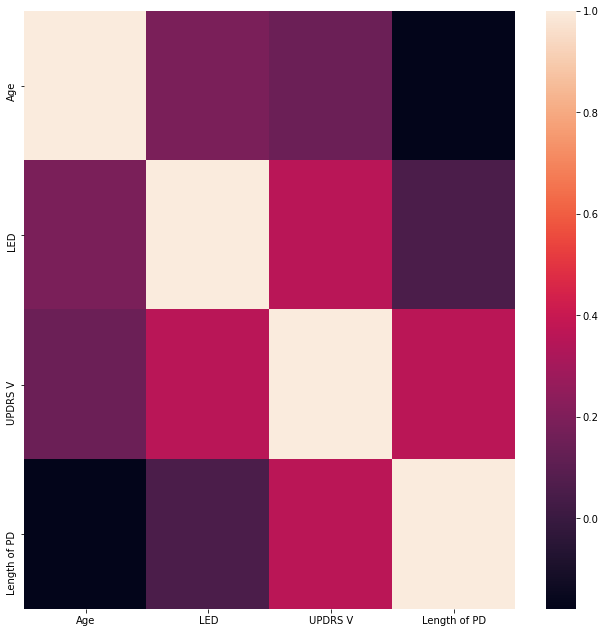

In [84]:
corr = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr)

In [85]:
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [86]:
correlated_features = correlation(data=X_train, threshold=.2)
len(set(correlated_features))

2

In [87]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

X_train.shape, X_test.shape

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


((52, 2), (23, 2))

In [88]:
df = pd.read_excel('PahaW.xlsx')
df.shape
df.head()

,ID,Nationality,Sex,Disease,PD status,Age,Dominant hand,LED,UPDRS V,Length of PD
0,1,Czech,F,PD,ON,68,R,1115.0,2.0,6.0
1,2,Czech,F,PD,ON,78,R,2110.0,2.0,8.0
2,3,Czech,F,PD,ON,69,R,1556.6,2.0,7.0
3,4,Czech,F,PD,ON,79,R,1691.0,2.0,12.0
4,5,Czech,F,PD,ON,69,R,600.0,2.0,2.0


In [89]:
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64','object']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [90]:
X = data.drop(['Nationality','Sex','Disease','PD status','Dominant hand','ID'], axis=1)
X.shape

(75, 4)

In [91]:
y = data['PD status']
y.shape

(75,)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((52, 4), (52,), (23, 4), (23,))

In [93]:
# Build a Dataframe with Correlation between Features
corr_matrix = X_train.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
# Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.2]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix.head()

,feature1,feature2,Correlation
0,Length of PD,UPDRS V,0.361510
1,UPDRS V,Length of PD,0.361510
2,UPDRS V,LED,0.360039
3,LED,UPDRS V,0.360039


In [94]:
grouped_features = []
correlated_groups = []

for feature in corr_matrix.feature1.unique():
    if feature not in grouped_features:
        # Find all features correlated to a single feature
        correlated_block = corr_matrix[corr_matrix.feature1 == feature]
        grouped_features = grouped_features + list(correlated_block.feature2.unique()) + [feature]
        
        # Append block of features to the list
        correlated_groups.append(correlated_block)

print('Found {} correlated feature groups'.format(len(correlated_groups)))
print('out of {} total features.'.format(X_train.shape[1]))

Found 2 correlated feature groups
out of 4 total features.


In [95]:
# Visualize Correlated Feature Groups
for group in correlated_groups:
    print(group)
    print('\n')

       feature1 feature2  Correlation
0  Length of PD  UPDRS V      0.36151


  feature1 feature2  Correlation
3      LED  UPDRS V     0.360039


